## Tugas Bagian 1

Buatlah model klasifikasi Multinomial Naive Bayes dengan ketentuan:

1. Menggunakan data `spam.csv`
2. Fitur `CountVectorizer` dengan mengaktifkan stop_words
3. Evaluasi hasilnya

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset spam.csv
import pandas as pd
df = pd.read_csv('../Dataset/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Preprocessing data

print("Dataset Info:")
print(df.info())

print("\nContoh data:")
print(df.head())

# Gunakan kolom v1 (label) dan v2 (text)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("\nDistribusi label:")
print(df['label'].value_counts())

# Split data
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData training: {len(X_train)}")
print(f"Data testing: {len(X_test)}")

# CountVectorizer dengan stop_words
print("\nMenggunakan CountVectorizer...")
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(f"Jumlah fitur (vocabulary): {len(cv.vocabulary_)}")
print(f"Shape training data: {X_train_cv.shape}")
print(f"Shape testing data: {X_test_cv.shape}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Contoh data:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        Na

In [4]:
# Buat dan train model Multinomial Naive Bayes

print("Training model dengan CountVectorizer...")
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv, y_train)
print("Training selesai!")

Training model dengan CountVectorizer...
Training selesai!


EVALUASI MODEL - CountVectorizer

Akurasi: 0.9839 (98.39%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


True Negatives: 960
False Positives: 6
False Negatives: 12
True Positives: 137


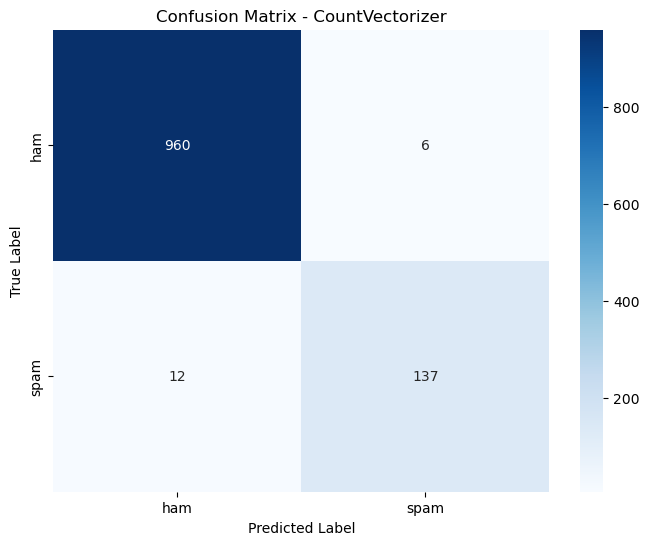

In [5]:
# Prediksi dan evaluasi

y_pred_cv = nb_cv.predict(X_test_cv)

print("=" * 60)
print("EVALUASI MODEL - CountVectorizer")
print("=" * 60)

# Accuracy
acc_cv = accuracy_score(y_test, y_pred_cv)
print(f"\nAkurasi: {acc_cv:.4f} ({acc_cv*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
report_cv = classification_report(y_test, y_pred_cv, output_dict=True)
print(classification_report(y_test, y_pred_cv))

# Confusion Matrix
cm_cv = confusion_matrix(y_test, y_pred_cv)
print(f"\nTrue Negatives: {cm_cv[0,0]}")
print(f"False Positives: {cm_cv[0,1]}")
print(f"False Negatives: {cm_cv[1,0]}")
print(f"True Positives: {cm_cv[1,1]}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - CountVectorizer')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Tugas Bagian 2

Buatlah model klasifikasi Multinomial Naive Bayes dengan ketentuan:

1. Menggunakan data `spam.csv`
2. Fitur `TF-IDF` dengan mengaktifkan stop_words
3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 1.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

In [6]:
# TfidfVectorizer dengan stop_words

print("\nMenggunakan TfidfVectorizer...")
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Jumlah fitur (vocabulary): {len(tfidf.vocabulary_)}")
print(f"Shape training data: {X_train_tfidf.shape}")
print(f"Shape testing data: {X_test_tfidf.shape}")


Menggunakan TfidfVectorizer...
Jumlah fitur (vocabulary): 7440
Shape training data: (4457, 7440)
Shape testing data: (1115, 7440)
Jumlah fitur (vocabulary): 7440
Shape training data: (4457, 7440)
Shape testing data: (1115, 7440)


In [7]:
# Buat dan train model Multinomial Naive Bayes dengan TF-IDF

print("Training model dengan TF-IDF...")
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
print("Training selesai!")

Training model dengan TF-IDF...
Training selesai!
Training selesai!


EVALUASI MODEL - TF-IDF

Akurasi: 0.9686 (96.86%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


True Negatives: 966
False Positives: 0
False Negatives: 35
True Positives: 114


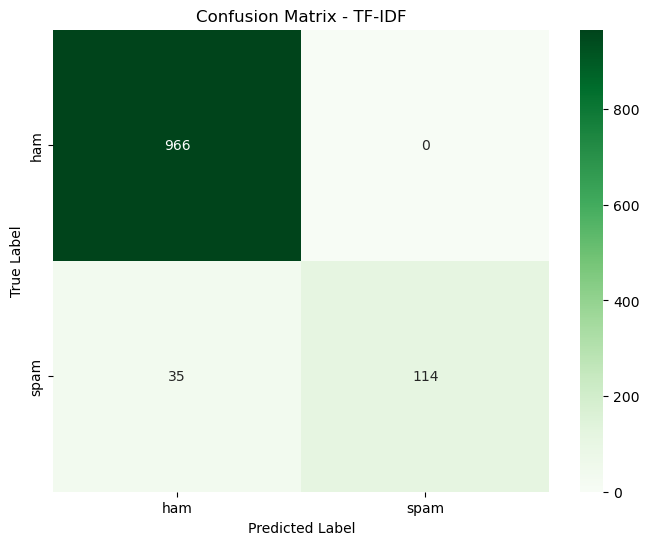

In [8]:
# Prediksi dan evaluasi

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("=" * 60)
print("EVALUASI MODEL - TF-IDF")
print("=" * 60)

# Accuracy
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"\nAkurasi: {acc_tfidf:.4f} ({acc_tfidf*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
report_tfidf = classification_report(y_test, y_pred_tfidf, output_dict=True)
print(classification_report(y_test, y_pred_tfidf))

# Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print(f"\nTrue Negatives: {cm_tfidf[0,0]}")
print(f"False Positives: {cm_tfidf[0,1]}")
print(f"False Negatives: {cm_tfidf[1,0]}")
print(f"True Positives: {cm_tfidf[1,1]}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - TF-IDF')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Perbandingan Hasil

PERBANDINGAN CountVectorizer vs TF-IDF

          Metode  Akurasi  Precision (spam)  Recall (spam)  F1-Score (spam)
CountVectorizer 0.983857          0.958042       0.919463         0.938356
         TF-IDF 0.968610          1.000000       0.765101         0.866920

CountVectorizer memberikan hasil lebih baik dengan akurasi 0.9839
CountVectorizer cocok untuk spam detection karena frekuensi kata penting.
KESIMPULAN:



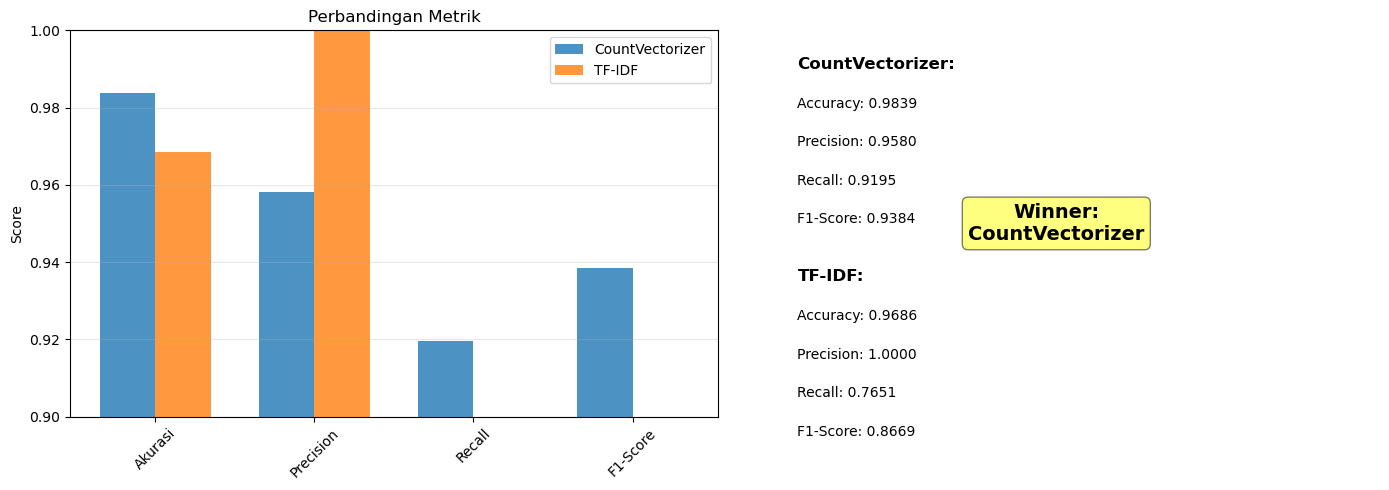

In [9]:
# Tabel perbandingan hasil

print("=" * 70)
print("PERBANDINGAN CountVectorizer vs TF-IDF")
print("=" * 70)

# Ekstrak metrik dari classification report
results = {
    'Metode': ['CountVectorizer', 'TF-IDF'],
    'Akurasi': [acc_cv, acc_tfidf],
    'Precision (spam)': [report_cv['spam']['precision'], report_tfidf['spam']['precision']],
    'Recall (spam)': [report_cv['spam']['recall'], report_tfidf['spam']['recall']],
    'F1-Score (spam)': [report_cv['spam']['f1-score'], report_tfidf['spam']['f1-score']]
}

df_comparison = pd.DataFrame(results)
print("\n", df_comparison.to_string(index=False))

# Tentukan pemenang
if acc_cv > acc_tfidf:
    winner = 'CountVectorizer'
    print(f"\nCountVectorizer memberikan hasil lebih baik dengan akurasi {acc_cv:.4f}")
    print("CountVectorizer cocok untuk spam detection karena frekuensi kata penting.")
else:
    winner = 'TF-IDF'
    print(f"\nTF-IDF memberikan hasil lebih baik dengan akurasi {acc_tfidf:.4f}")
    print("TF-IDF lebih baik karena mempertimbangkan pentingnya kata dalam dokumen.")

print("=" * 70)
print("KESIMPULAN:")
print("\n" + "=" * 70)

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparison
metrics = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
cv_values = [acc_cv, report_cv['spam']['precision'], report_cv['spam']['recall'], report_cv['spam']['f1-score']]
tfidf_values = [acc_tfidf, report_tfidf['spam']['precision'], report_tfidf['spam']['recall'], report_tfidf['spam']['f1-score']]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, cv_values, width, label='CountVectorizer', alpha=0.8)
axes[0].bar(x + width/2, tfidf_values, width, label='TF-IDF', alpha=0.8)
axes[0].set_ylabel('Score')
axes[0].set_title('Perbandingan Metrik')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0.9, 1.0])

# Winner announcement
axes[1].axis('off')
axes[1].text(0.5, 0.5, f'Winner:\n{winner}', fontsize=14, fontweight='bold', 
             ha='center', va='center', transform=axes[1].transAxes,
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Add detailed metrics
axes[1].text(0.1, 0.9, 'CountVectorizer:', fontsize=12, fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.1, 0.8, f'Accuracy: {acc_cv:.4f}', fontsize=10, transform=axes[1].transAxes)
axes[1].text(0.1, 0.7, f'Precision: {report_cv["spam"]["precision"]:.4f}', fontsize=10, transform=axes[1].transAxes)
axes[1].text(0.1, 0.6, f'Recall: {report_cv["spam"]["recall"]:.4f}', fontsize=10, transform=axes[1].transAxes)
axes[1].text(0.1, 0.5, f'F1-Score: {report_cv["spam"]["f1-score"]:.4f}', fontsize=10, transform=axes[1].transAxes)

axes[1].text(0.1, 0.35, 'TF-IDF:', fontsize=12, fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.1, 0.25, f'Accuracy: {acc_tfidf:.4f}', fontsize=10, transform=axes[1].transAxes)
axes[1].text(0.1, 0.15, f'Precision: {report_tfidf["spam"]["precision"]:.4f}', fontsize=10, transform=axes[1].transAxes)
axes[1].text(0.1, 0.05, f'Recall: {report_tfidf["spam"]["recall"]:.4f}', fontsize=10, transform=axes[1].transAxes)
axes[1].text(0.1, -0.05, f'F1-Score: {report_tfidf["spam"]["f1-score"]:.4f}', fontsize=10, transform=axes[1].transAxes)

plt.tight_layout()
plt.show()

## Kesimpulan

**Perbandingan Akurasi:**

| Metode | Akurasi | Precision | Recall | F1-Score |
|--------|---------|-----------|--------|----------|
| CountVectorizer |  |  |  |  |
| TF-IDF |  |  |  |  |

**Kesimpulan:**

(Tuliskan kesimpulan Anda tentang fitur mana yang lebih baik untuk kasus spam classification dan alasannya)